<a href="https://colab.research.google.com/github/Hoa20146128/AI-Homework/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
%cd /content/drive/MyDrive/AI/

/content/drive/MyDrive/AI


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/VN banknotes/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 50 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'100k': 0, '10k': 1, '200k': 2, '20k': 3, '500k': 4, '50k': 5, '5k': 6}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
2/2 [==============================] - 4s 90ms/step - loss: 11.1288 - accuracy: 0.1600
Epoch 2/100
2/2 [==============================] - 1s 562ms/step - loss: 2.2915 - accuracy: 0.1200
Epoch 3/100
2/2 [==============================] - 1s 255ms/step - loss: 1.9786 - accuracy: 0.1000
Epoch 4/100
2/2 [==============================] - 1s 307ms/step - loss: 1.9336 - accuracy: 0.1600
Epoch 5/100
2/2 [==============================] - 1s 213ms/step - loss: 1.8983 - accuracy: 0.3000
Epoch 6/100
2/2 [==============================] - 1s 656ms/step - loss: 1.8248 - accuracy: 0.3400
Epoch 7/100
2/2 [==============================] - 1s 445ms/step - loss: 1.7410 - accuracy: 0.3400
Epoch 8/100
2/2 [==============================] - 1s 481ms/step - loss: 1.7819 - accuracy: 0.2000
Epoch 9/100
2/2 [==============================] - 1s 589ms/step - loss: 1.5915 - accuracy: 0.4600
Epoch 10/100
2/2 [==============================] - 1s 552ms/step - loss: 1.6842 - accuracy: 0.3400
Epoch 11/

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.043108683079481125
Train Accuracy 1.0


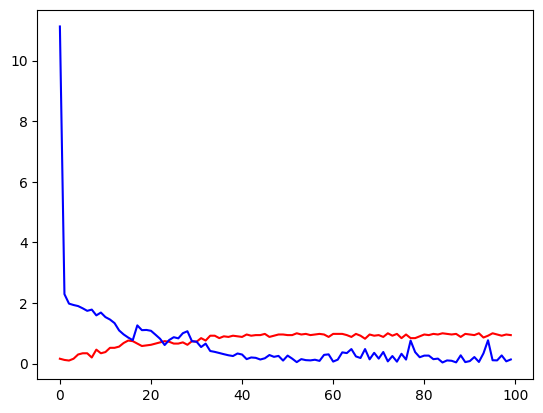

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'r', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()


In [ ]:
# Lưu lại
model.save("VNbanknotes.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model("VNbanknotes.h5")

In [ ]:
test= "/content/drive/MyDrive/AI/VN banknotes/test"

1/1 [==============================] - 0s 18ms/step
5k


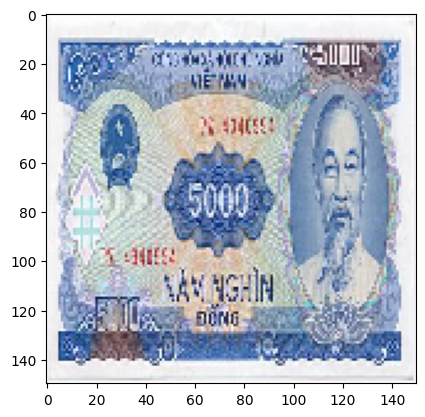

1/1 [==============================] - 0s 23ms/step
5k


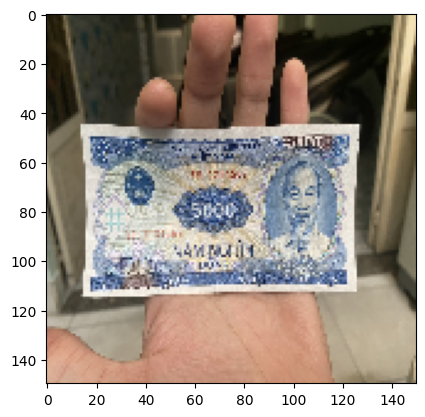

1/1 [==============================] - 0s 20ms/step
5k


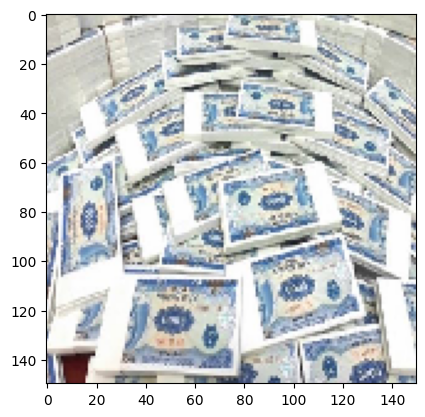

1/1 [==============================] - 0s 17ms/step
5k


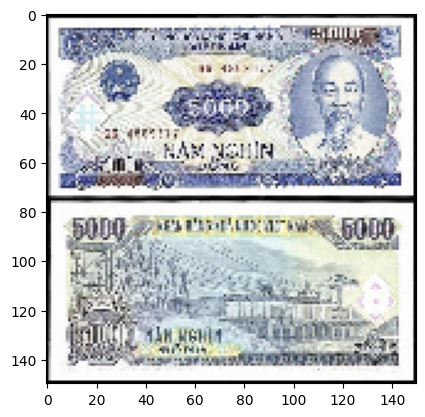

1/1 [==============================] - 0s 20ms/step
10k


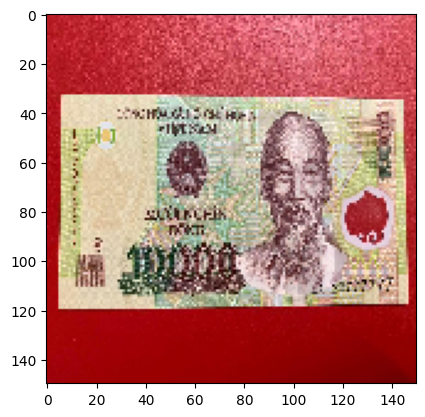

1/1 [==============================] - 0s 19ms/step
10k


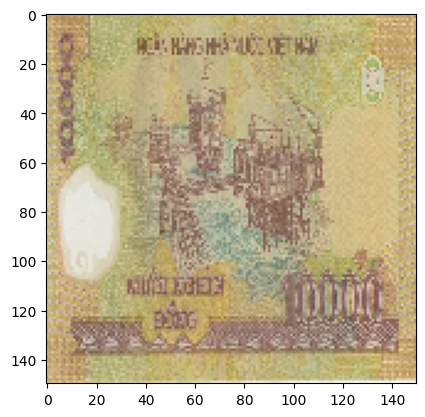

1/1 [==============================] - 0s 20ms/step
20k


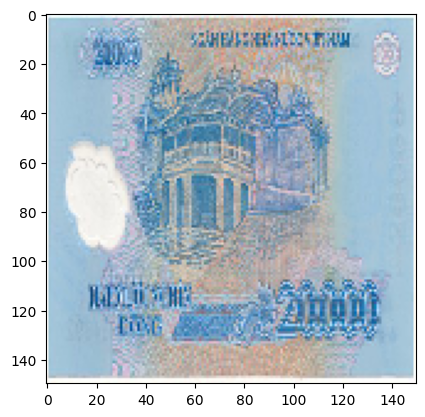

1/1 [==============================] - 0s 20ms/step
20k


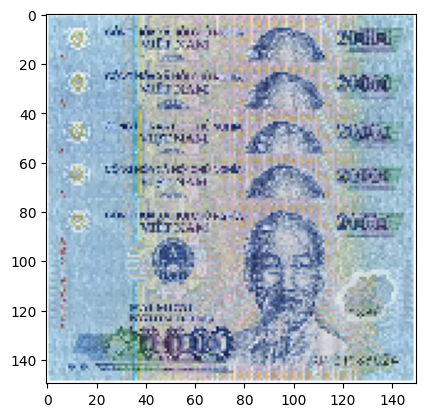

1/1 [==============================] - 0s 18ms/step
50k


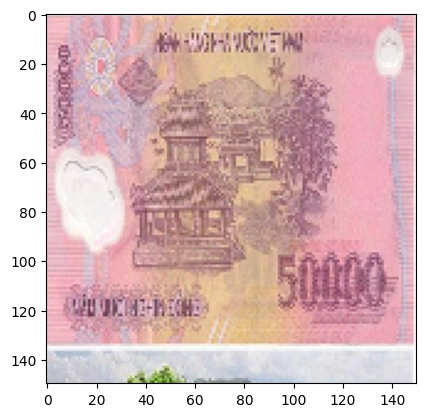

1/1 [==============================] - 0s 18ms/step
50k


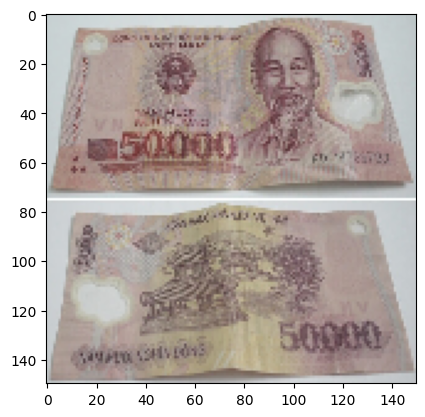

1/1 [==============================] - 0s 20ms/step
100k


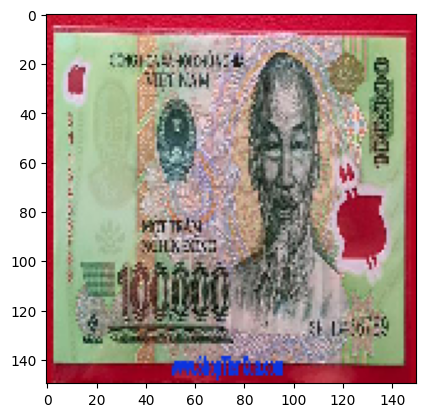

1/1 [==============================] - 0s 17ms/step
100k


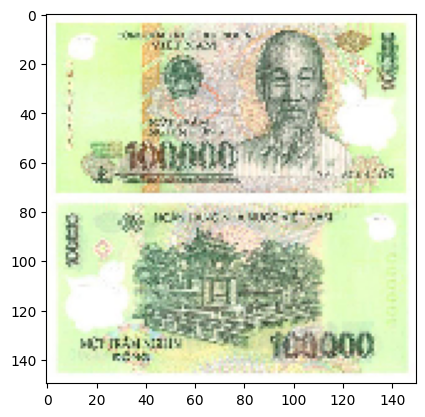

1/1 [==============================] - 0s 23ms/step
200k


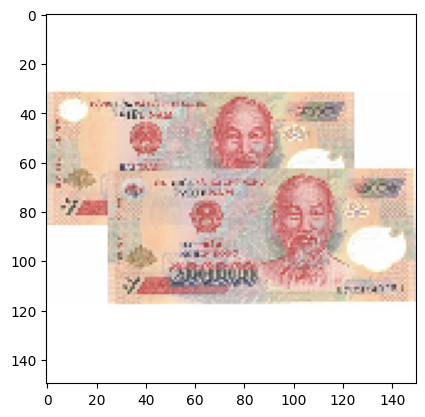

1/1 [==============================] - 0s 26ms/step
200k


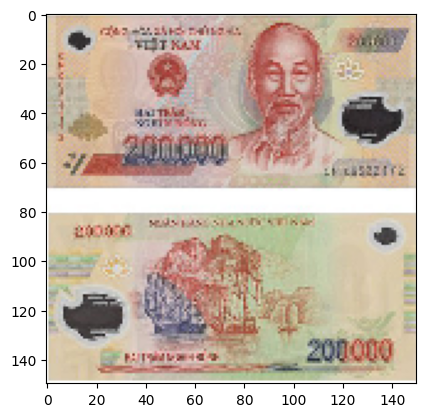

1/1 [==============================] - 0s 19ms/step
500k


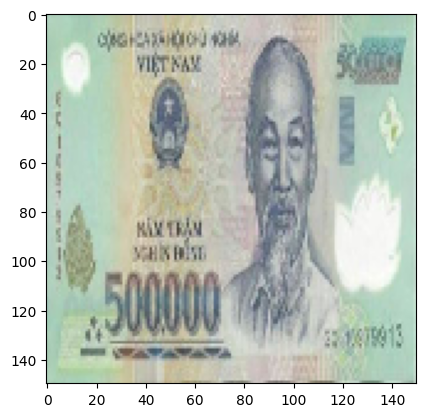

1/1 [==============================] - 0s 20ms/step
500k


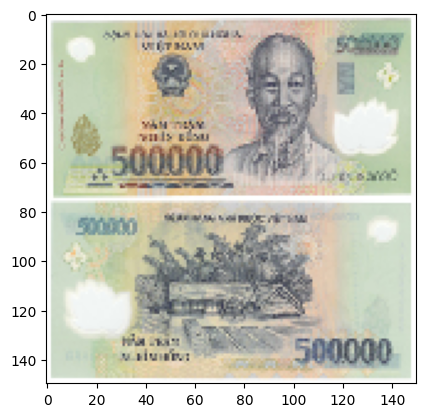

In [ ]:
# {'100k': 0, '10k': 1, '200k': 2, '20k': 3, '500k': 4, '50k': 5, '5k': 6}
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='100k'
  if round(result[0][1])==1:
    prediction='10k'
  if round(result[0][2])==1:
    prediction='200k'
  if round(result[0][3])==1:
    prediction='20k'
  if round(result[0][4])==1:
    prediction='500k'
  if round(result[0][5])==1:
    prediction='50k'
  if round(result[0][6])==1:
    prediction='5k'
  print(prediction)
  plt.show()